# Model Performance Testing 
<img src="https://www.ntaskmanager.com/wp-content/uploads/2021/10/artificial-intelligence-in-project-management.jpg">

In [30]:
# to subpress warning
import warnings
warnings.filterwarnings("ignore")


# The OS module in Python provides functions for interacting with the operating system.
import os

# Matplotlib is a data visualization and graphical plotting library for Python.
import matplotlib.pyplot as plt

# seaborn is alse a data visualization and graphical plotting library for Python.
import seaborn as sn

# Used to display markdown,image,control (frontend utilities)
from IPython.display import display, clear_output

# NumPy is a Python library used for working with arrays
import numpy as np

import pandas as pd

import pickle
# used to split dataset(features and target) into test and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# shuffle the dataset for a even mixture of each type of feature and target.it gives better result.
from sklearn.utils import shuffle

# Computer vision library
import cv2

# Used to manipulate different parts of the Python runtime environment.
import sys

# An open-source framework for building pipelines to perform computer vision inference.
import mediapipe as mp

# Time module provide time-related functions
import time

# Used to generate random numbers
import random

from math import log10, sqrt
# for mathematical operations

# Keras is a library that provides a Python interface for artificial neural networks. 
# Keras acts as an interface for the TensorFlow library.
import keras

import tensorflow as tf

# 1. Keras layers are the building blocks of the Keras library that can be stacked together for creating neural network models.
# 2. Keras Conv2D creates a 2D convolution kernel that is wind with layers input which helps produce a tensor of outputs.
# 3. maxpooling2D Downsamples the input along its spatial dimensions by taking the maximum value over an input window for each channel of the input. 
# 4 .Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
# 5 .Dropout regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data.
# 6. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

#  Model groups layers into an object with training and inference features.
from tensorflow.keras.models import Model

# Optimizers are the extended class, which include added information to train a specific model.  
# The optimizers are used for improving speed and performance for training a specific model.
# Adam is a stochastic gradient descent method based on adaptive estimation of first-order and second-order moments.
from tensorflow.keras.optimizers import Adam

# importing Sqquential model
from tensorflow.keras import Sequential

# tensorflow.keras.callbacks is used to visualize training of a model.
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint 

In [31]:
# GPU Info 
try:
    import GPUtil
except:
    !pip install GPUtil
    import GPUtil

    
# check physical computing devices
device=tf.config.experimental.list_physical_devices()
for i in device:
    print(i)
if len(device)>1:
    # find GPU details
    print("="*20, "GPU Details", "="*20)
    gpus = GPUtil.getGPUs()
    for gpu in gpus:
        print(gpu_id,gpu.name, gpu.driver,gpu.memoryTotal,gpu.temperature)



PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [32]:
test_object={}
with (open("test_data.pkl", "rb")) as openfile:
    try:
        test_object=pickle.load(openfile)
    except EOFError as e:
        print("Error : ",e)

test_x=test_object["test_x"]
test_y=test_object["test_y"]
testFilenames=test_object["testFilenames"]
unique_sign=test_object["unique_sign"]

In [46]:
model = tf.keras.models.load_model('./model.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 42)                1890      
                                                                 
 dense_17 (Dense)            (None, 40)                1720      
                                                                 
 dense_18 (Dense)            (None, 38)                1558      
                                                                 
 dense_19 (Dense)            (None, 36)                1404      
                                                                 
Total params: 6,572
Trainable params: 6,572
Non-trainable params: 0
_________________________________________________________________


In [47]:
y_pred_eval=model.evaluate(test_x, test_y)
y_pred=model.predict(test_x)

8/8 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.9524


In [48]:
y_pred_labels=[unique_sign[np.argmax(i)] for i in y_pred]
y_test_labels=[unique_sign[np.argmax(i)] for i in test_y.values]
df = pd.DataFrame(list(zip(y_pred_labels, y_test_labels)),
               columns =['Original', 'predicted'])
df

,Original,predicted
0,s,s
1,p,p
2,a,a
3,v,v
4,p,p
...,...,...
247,9,9
248,x,x
249,8,8
250,a,a


In [49]:
Correct=0
wrong=0
accuracy=round(y_pred_eval[1]*100,2)
for i in range(len(y_pred)):
    if y_pred_labels[i]==y_test_labels[i]:
        Correct+=1
    else:
        print("index {} | Original {} | predicted {}".format(i,y_test_labels[i],y_pred_labels[i]))
        wrong+=1
print("\n\n-----| Evaluation Result |-----")
print("Total : {} \nRight : {} \nWrong : {}".format(len(y_pred),Correct,wrong))
print("Accuracy : {}".format(accuracy))

index 14 | Original v | predicted 2
index 39 | Original s | predicted n
index 61 | Original o | predicted 0
index 82 | Original u | predicted r
index 88 | Original o | predicted 0
index 96 | Original s | predicted t
index 125 | Original c | predicted 0
index 129 | Original 6 | predicted w
index 138 | Original w | predicted 6
index 189 | Original m | predicted n
index 199 | Original r | predicted g
index 237 | Original n | predicted 0


-----| Evaluation Result |-----
Total : 252 
Right : 240 
Wrong : 12
Accuracy : 95.24


Text(0.5, 1.0, 'ASL_keypoint_detector  |    accuracy : 95.24')

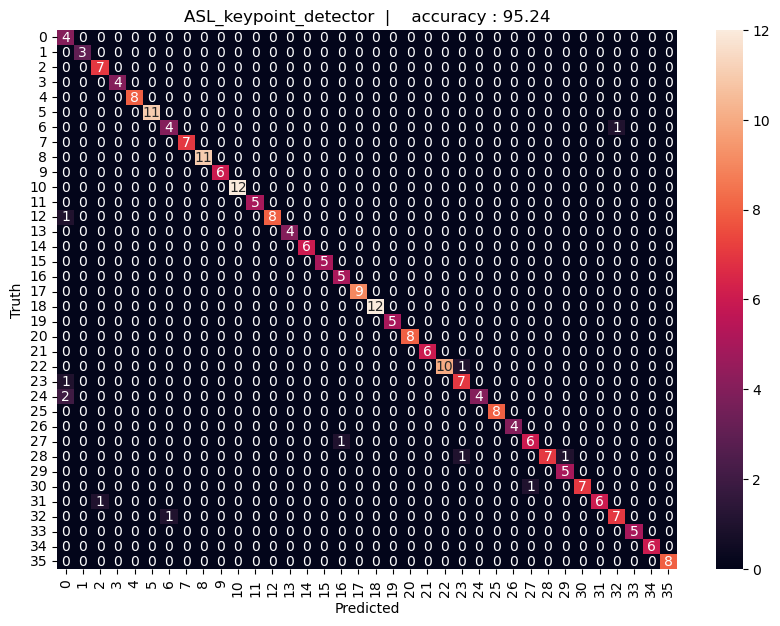

In [50]:
y_pred_labels1=[np.argmax(i) for i in y_pred]
y_test_labels1=[np.argmax(i) for i in test_y.values]
cm=tf.math.confusion_matrix(labels=y_test_labels1,predictions=y_pred_labels1)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("ASL_keypoint_detector  |    accuracy : "+str(round(accuracy,4)))

In [51]:
print(classification_report(y_test_labels1,y_pred_labels1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      1.00      1.00         3
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11
           6       0.80      0.80      0.80         5
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         5
          12       1.00      0.89      0.94         9
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00    

In [39]:
def graph_generator(data,color="black",marker="o"):
    ax=plt.subplot()
    ax.plot(data["method"], data["value"], color=color, marker=marker)
#     plt.title(data["Title"], fontsize=14)
    plt.xlabel(data["x_title"], fontsize=14)
    plt.ylabel(data["y_title"], fontsize=14)
    for i, v in enumerate(data["value"]):
        ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')
#     plt.legend(handles=data["method"])
#     ax.grid(False)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.ylim(min(data["value"])-1, max(data["value"])+2)
    plt.xlim(-1,8)
    plt.show()

In [52]:
# compression ratio graph
methods=['VGG-16',
 'SqueezeNet',
 'InceptionResNetv2',
 'NasNetMobile',
 'DenseNet169',
 'Xception',
 'MobileNet v2',
 '2-stage detection algorithm']
acc_graph={
    "method":methods,
    "value":[0.908, 0.832, 0.849, 0.733, 0.849, 0.919, 0.903, 0.952],
    "y_title":"Accuracy",
    "x_title":"Method names",
    "Title":"Comparison graph of various method based on compression ratio"
}


er_graph={
    "method":methods,
    "value":[0.092, 0.168, 0.151, 0.267, 0.151, 0.081, 0.097, 0.06],
    "y_title":"Error Rate",
    "x_title":"Method names",
    "Title":"Comparison graph of various method based on PSNR"
}

p_graph={
    "method":methods,
    "value":[0.918, 0.842, 0.859, 0.743, 0.859, 0.929, 0.913, 0.95],
    "y_title":"Precision",
    "x_title":"Method names",
    "Title":"Comparison graph of various method based on SNR"
}

r_graph={
    "method":methods,
    "value":[0.888, 0.812, 0.829, 0.713, 0.829, 0.899, 0.883, 0.91],
    "y_title":"Recall",
    "x_title":"Method names",
    "Title":"Comparison graph of various method based on SSI"
}

f1_graph={
    "method":methods,
    "value":[0.915, 0.827, 0.841, 0.742, 0.844, 0.912, 0.915, 0.951],
    "y_title":"F1 Score",
    "x_title":"Method names",
    "Title":"Comparison graph of various method based on MSE"
}





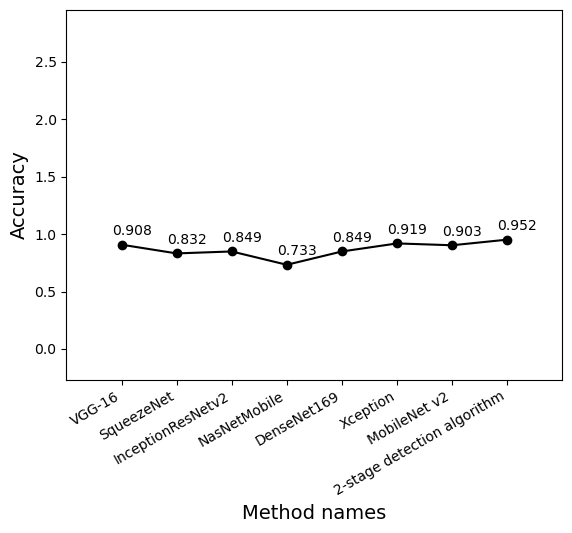

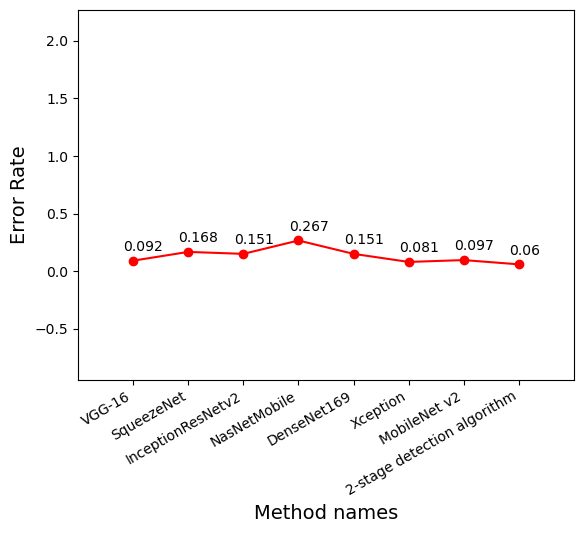

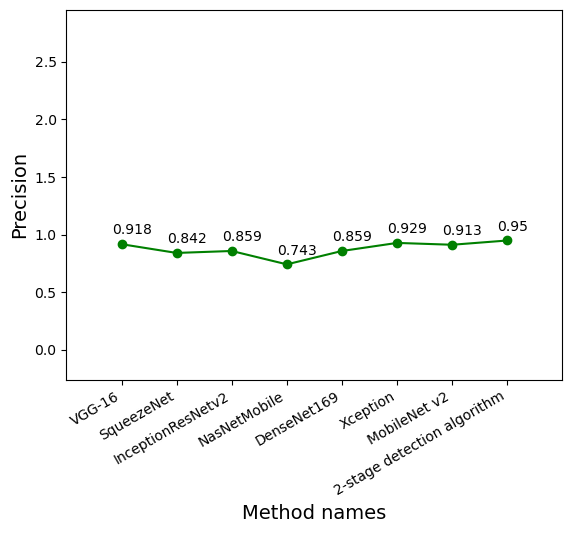

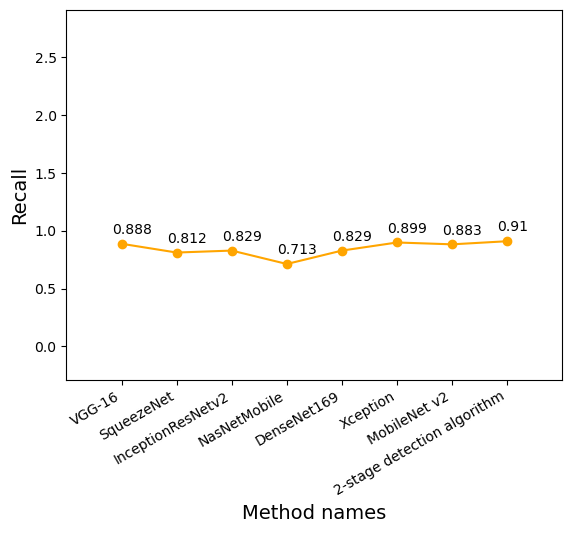

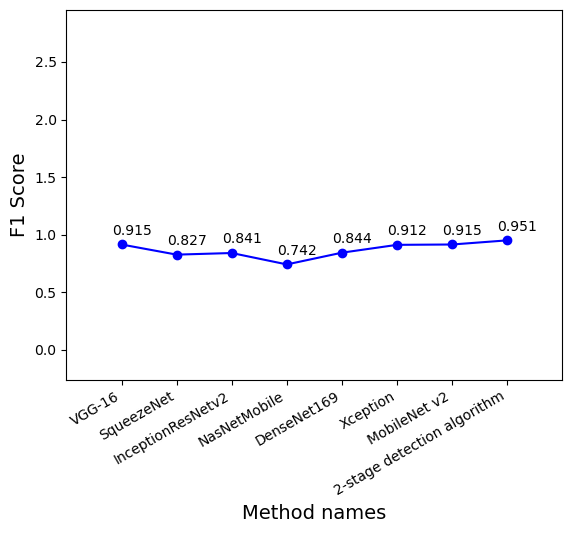

In [53]:
graph_generator(acc_graph)
graph_generator(er_graph,color="red")
graph_generator(p_graph,color="green")
graph_generator(r_graph,color="orange")
graph_generator(f1_graph,color="blue")

In [29]:
data="""VGG-16
SqueezeNet
InceptionResNetv2
NasNetMobile
DenseNet169
Xception
MobileNet v2
2-stage detection algorithm""".split("\n")
# data
[x for x in data]

['VGG-16',
 'SqueezeNet',
 'InceptionResNetv2',
 'NasNetMobile',
 'DenseNet169',
 'Xception',
 'MobileNet v2',
 '2-stage detection algorithm']